In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read input marks as CSV file

In [15]:
marks = pd.read_csv('marks.csv', delimiter = ",")

In [16]:
marks.head(10)

,Roll,CD_Mid,CD_End
0,1,8,6
1,2,18,23
2,3,28,35
3,4,18,20
4,5,12,21
5,6,27,31
6,7,10,15
7,8,23,37
8,9,17,27
9,10,21,35


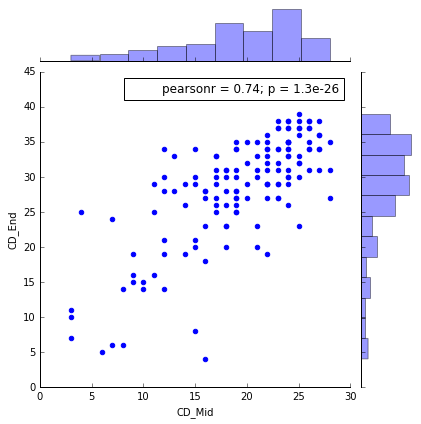

In [17]:
sns.jointplot(x = 'CD_Mid', y = 'CD_End', data = marks)

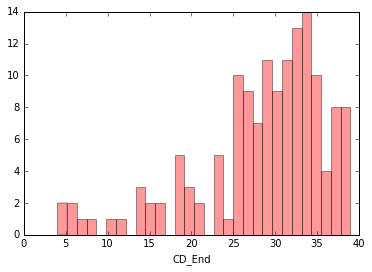

In [19]:
sns.distplot(marks['CD_End'],bins=30,kde=False,color='red')

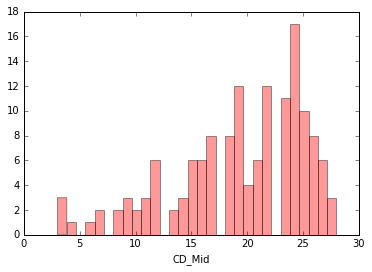

In [20]:
sns.distplot(marks['CD_Mid'],bins=30,kde=False,color='red')

In [21]:
#Calculate total marks, Mean, Standard Deviation
marks['CD_Total'] = marks['CD_Mid'] + marks['CD_End']
marks['Mean'] = np.mean(marks['CD_Total'])
marks['SD'] = np.sqrt(np.mean(abs(marks['CD_Total'] - marks['Mean'])**2))

#Calculate Z = (Total-Mean)/SD
marks['Z'] = ((marks['CD_Total'] - marks['Mean'])/marks['SD'])

In [30]:
marks.head(5)

,Roll,CD_Mid,CD_End,CD_Total,Mean,SD,Z,G
0,1,8,6,14,47.675862,12.810493,-2.628772,0
1,2,18,23,41,47.675862,12.810493,-0.521125,5
2,3,28,35,63,47.675862,12.810493,1.196218,9
3,4,18,20,38,47.675862,12.810493,-0.755308,5
4,5,12,21,33,47.675862,12.810493,-1.145613,4


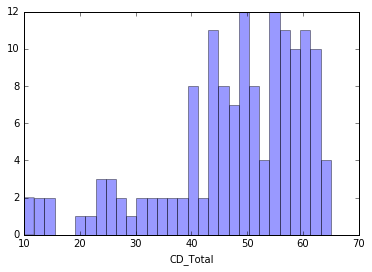

In [31]:
sns.distplot(marks['CD_Total'],bins=30,kde=False,color='blue')

# Mapping Z-score to the grade values

In [32]:
Low_Z = [1.5, 1.0, 0.5, 0.0 , -0.5, -1.0, -1.5, -100]
Upp_Z = [100, 1.5, 1.0, 0.5, 0.0, -0.5, -1.0, -1.5]
Grade = [10, 9, 8, 7, 6, 5, 4, 0]

Points = []

for index, row in marks.iterrows():
    for i in xrange(0, 8):
        if row['Z'] <= Upp_Z[i] and row['Z'] > Low_Z[i]:
            Points.append(Grade[i])
            break

marks['G'] = Points
marks.to_csv('Grades.csv', sep = ',', index = False)

In [33]:
marks.head(5)

,Roll,CD_Mid,CD_End,CD_Total,Mean,SD,Z,G
0,1,8,6,14,47.675862,12.810493,-2.628772,0
1,2,18,23,41,47.675862,12.810493,-0.521125,5
2,3,28,35,63,47.675862,12.810493,1.196218,9
3,4,18,20,38,47.675862,12.810493,-0.755308,5
4,5,12,21,33,47.675862,12.810493,-1.145613,4


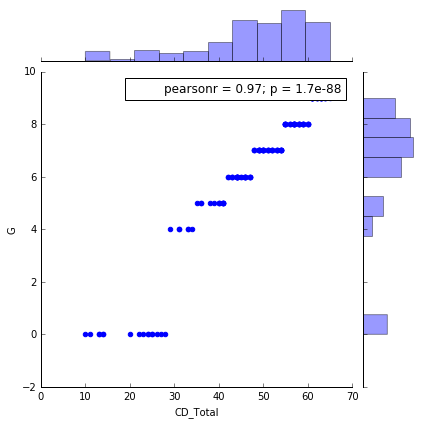

In [34]:
sns.jointplot(x = 'CD_Total', y = 'G', data = marks)